In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Sütün adları değiştirirme

In [7]:
df.rename(columns = {"total_bill": "fiyat",
                     "tip": "bahşiş",
                     "sex": "cinsiyet",
                     "smoker": "sigara",
                     "day": "gün",
                     "time": "zaman",
                     "size": "kişiler"})

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Değiştime işlemi gerçekleşmedi çünkü inplace = True yapmadık 

In [9]:
df.rename(columns = {"total_bill": "fiyat",
                     "tip": "bahşiş",
                     "sex": "cinsiyet",
                     "smoker": "sigara",
                     "day": "gün",
                     "time": "zaman",
                     "size": "kişiler"}, inplace = True)

In [10]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# İçeriklerin değiştirmesi

# 1.Cinsiyet

In [11]:
df.cinsiyet.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [12]:
df["cinsiyet"] = df.cinsiyet.map({"Female": "Kadın","Male":"Erkek"})

In [13]:
df.tail()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
239,29.03,5.92,Erkek,No,Sat,Dinner,3
240,27.18,2.00,Kadın,Yes,Sat,Dinner,2
241,22.67,2.00,Erkek,Yes,Sat,Dinner,2
242,17.82,1.75,Erkek,No,Sat,Dinner,2
243,18.78,3.00,Kadın,No,Thur,Dinner,2


# 2.Sigara

In [14]:
df.sigara.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [15]:
df["sigara"] = df.sigara.map({"No": "Hayır", "Yes": "Evet"})

In [16]:
df.tail()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
239,29.03,5.92,Erkek,Hayır,Sat,Dinner,3
240,27.18,2.00,Kadın,Evet,Sat,Dinner,2
241,22.67,2.00,Erkek,Evet,Sat,Dinner,2
242,17.82,1.75,Erkek,Hayır,Sat,Dinner,2
243,18.78,3.00,Kadın,Hayır,Thur,Dinner,2


# 3.Gün

In [17]:
df.gün.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [18]:
df["gün"] = df.gün.map({"Sun": "Pazar","Sat": "Cumartesi", "Thur": "Perşembe",
            "Fri": "Cuma"})

In [19]:
df.tail()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
239,29.03,5.92,Erkek,Hayır,Cumartesi,Dinner,3
240,27.18,2.00,Kadın,Evet,Cumartesi,Dinner,2
241,22.67,2.00,Erkek,Evet,Cumartesi,Dinner,2
242,17.82,1.75,Erkek,Hayır,Cumartesi,Dinner,2
243,18.78,3.00,Kadın,Hayır,Perşembe,Dinner,2


# 4.Zaman

In [20]:
df.zaman.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [21]:
df["zaman"] = df.zaman.map({"Dinner": "Akşam", "Lunch": "Öğlen"})

In [22]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Kadın,Hayır,Pazar,Akşam,2
1,10.34,1.66,Erkek,Hayır,Pazar,Akşam,3
2,21.01,3.50,Erkek,Hayır,Pazar,Akşam,3
3,23.68,3.31,Erkek,Hayır,Pazar,Akşam,2
4,24.59,3.61,Kadın,Hayır,Pazar,Akşam,4


# Görselleştirme İşlemleri 

In [23]:
import matplotlib.pyplot as plt

In [24]:
df.gün.value_counts()

Cumartesi    87
Pazar        76
Perşembe     62
Cuma         19
Name: gün, dtype: int64

<AxesSubplot:>

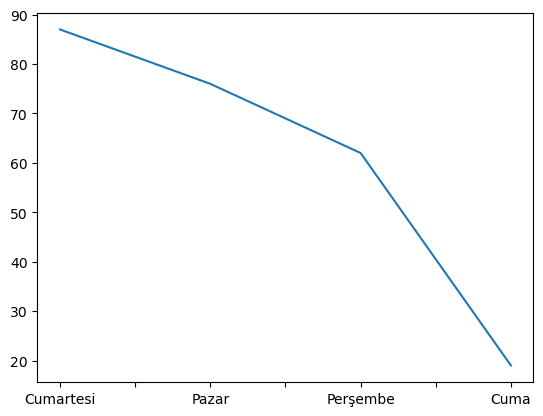

In [25]:
df.gün.value_counts().plot()

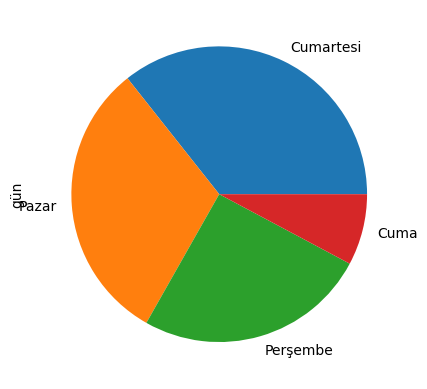

In [26]:
df.gün.value_counts().plot(kind = "pie");

Text(0, 0.5, ' ')

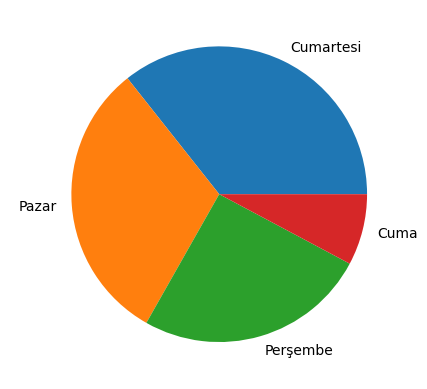

In [27]:
df.gün.value_counts().plot(kind = "pie")
plt.ylabel(" ")

# Günler Pasta grafigi

Text(0, 0.5, ' ')

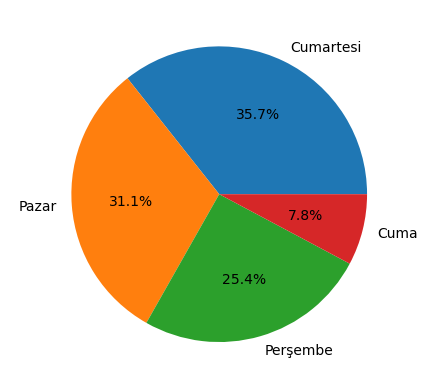

In [28]:
df.gün.value_counts().plot(kind = "pie", autopct = "%.1f%%");
plt.ylabel(" ")

# Cinsiyet pasta grafigi

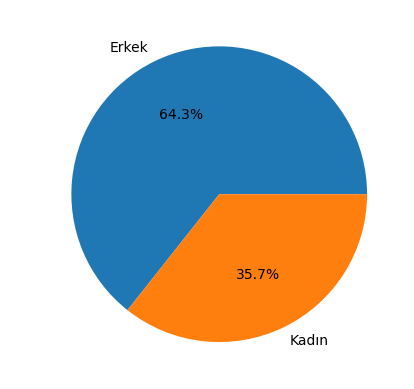

In [29]:
df.cinsiyet.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel(" ");

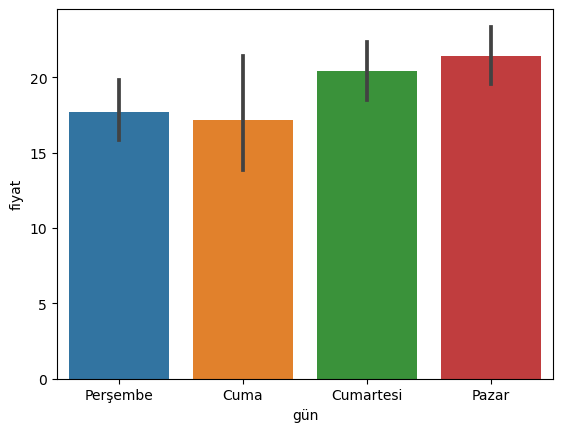

In [30]:
sns.barplot(x = "gün", y = "fiyat", data = df);

* İkinci bir boyut eklemek istiyorsak hue argümanı kullanılır.

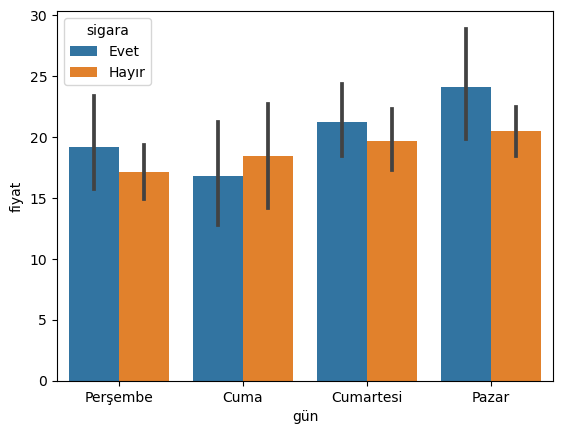

In [31]:
sns.barplot(x = "gün", y = "fiyat", hue = "sigara", data = df);

In [32]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Kadın,Hayır,Pazar,Akşam,2
1,10.34,1.66,Erkek,Hayır,Pazar,Akşam,3
2,21.01,3.50,Erkek,Hayır,Pazar,Akşam,3
3,23.68,3.31,Erkek,Hayır,Pazar,Akşam,2
4,24.59,3.61,Kadın,Hayır,Pazar,Akşam,4


# String ifadeleri sayısal hale getirme

# 1.Cinsiyet

In [33]:
df["cinsiyet"] = df.cinsiyet.map({"Kadın": 1, "Erkek": 2})

# 2.Sigara

In [34]:
df.sigara.unique()

['Hayır', 'Evet']
Categories (2, object): ['Evet', 'Hayır']

In [35]:
df["sigara"] = df.sigara.map({"Evet": 1, "Hayır":2})

# 3.Günler

In [36]:
df.gün.unique()

['Pazar', 'Cumartesi', 'Perşembe', 'Cuma']
Categories (4, object): ['Perşembe', 'Cuma', 'Cumartesi', 'Pazar']

In [37]:
df["gün"] = df.gün.map({"Perşembe": 1, "Cuma": 2, "Cumartesi": 3, "Pazar": 4})

# 4.Zaman

In [38]:
df.zaman.unique()

['Akşam', 'Öğlen']
Categories (2, object): ['Öğlen', 'Akşam']

In [39]:
df["zaman"] = df.zaman.map({"Akşam": 2, "Öğlen":1})

In [40]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,1,2,4,2,2
1,10.34,1.66,2,2,4,2,3
2,21.01,3.50,2,2,4,2,3
3,23.68,3.31,2,2,4,2,2
4,24.59,3.61,1,2,4,2,4


# K En yakın komşu algoritması

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings("ignore")

In [42]:
# Train-Test (Eğitim - Test)

In [43]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,1,2,4,2,2
1,10.34,1.66,2,2,4,2,3
2,21.01,3.50,2,2,4,2,3
3,23.68,3.31,2,2,4,2,2
4,24.59,3.61,1,2,4,2,4


* Genellikle makine öğrenmesindeki bağımsız değişkenler büyük X ile gösterilir.


# Bağımlı ve bağımsız değişken ayırıldı

In [44]:
# Fiyat sütünu gitti
X = df.drop(["fiyat"], axis = 1)
y = df["fiyat"]

In [45]:
#Train test metodu kullanımı
X_train, X_test, y_train, y_test = train_test_split(X, y 
                                                   , test_size = 0.20,
                                                   random_state = 42)

In [46]:
X_train[0:10]

,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
228,2.72,2,2,3,2,2
208,2.03,2,1,3,2,2
96,4.00,2,1,2,2,2
167,4.50,2,2,4,2,4
84,2.03,2,2,1,1,2
55,3.51,2,2,4,2,2
86,2.00,2,2,1,1,2
172,5.15,2,1,4,2,2
242,1.75,2,2,3,2,2
152,2.74,2,2,4,2,3


In [47]:
X_train.shape

(195, 6)

In [48]:
X_test.shape

(49, 6)

In [49]:
y_train.shape

(195,)

In [50]:
y_test.shape

(49,)

# Model Oluşturma

In [60]:
#knn_model adında KNeighborsRegressor algoritmasında 1 nesne oluşturuldu
knn_model = KNeighborsRegressor()

In [61]:
knn_model

KNeighborsRegressor()

In [62]:
#Model eğitiliyor
model = knn_model.fit(X_train , y_train)

In [63]:
model

KNeighborsRegressor()

In [64]:
new_data = [[2],[1],[1],[1],[1],[2]]

In [67]:
new_data = pd.DataFrame(new_data).T

In [68]:
model.predict(new_data)

array([13.694])

In [69]:
y_pred = model.predict(X_test)

In [70]:
# Test hatası öğrenme
np.sqrt(mean_squared_error(y_test,y_pred))

6.698439154164261

In [72]:
# Eğitim hatası öğrenme
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

5.122797228678278

In [74]:
# Eğitim hatasını bulma
for k in range(30):
    k=k+1
    k_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = k_model.predict(X_train)
    hata = np.sqrt(mean_squared_error(y_train,y_pred))
    
    print("k değeri = ",k, " hata değeri = ",hata)

k değeri =  1  hata değeri =  1.4968462572852022
k değeri =  2  hata değeri =  4.167074959482817
k değeri =  3  hata değeri =  4.6896942598331774
k değeri =  4  hata değeri =  5.079752823711012
k değeri =  5  hata değeri =  5.122797228678278
k değeri =  6  hata değeri =  5.2772201468796505
k değeri =  7  hata değeri =  5.445193549279551
k değeri =  8  hata değeri =  5.470083982356986
k değeri =  9  hata değeri =  5.6697702986099605
k değeri =  10  hata değeri =  5.766707951682658
k değeri =  11  hata değeri =  5.818068288883619
k değeri =  12  hata değeri =  5.813599419964534
k değeri =  13  hata değeri =  5.858655167374318
k değeri =  14  hata değeri =  5.9173129703536596
k değeri =  15  hata değeri =  5.999474977978991
k değeri =  16  hata değeri =  6.016636113160668
k değeri =  17  hata değeri =  6.045158835209828
k değeri =  18  hata değeri =  6.024856869466902
k değeri =  19  hata değeri =  6.026635165060382
k değeri =  20  hata değeri =  6.066968984296051
k değeri =  21  hata değ

In [75]:
# Test hatasını bulma
for k in range(30):
    k=k+1
    k_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = k_model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test,y_pred))
    
    print("k değeri = ",k, " hata değeri = ",hata)

k değeri =  1  hata değeri =  7.829804777715908
k değeri =  2  hata değeri =  7.234484241803141
k değeri =  3  hata değeri =  6.770002327863291
k değeri =  4  hata değeri =  6.662769560346937
k değeri =  5  hata değeri =  6.698439154164261
k değeri =  6  hata değeri =  6.579390664740496
k değeri =  7  hata değeri =  6.478038579698846
k değeri =  8  hata değeri =  6.508237732787547
k değeri =  9  hata değeri =  6.300136510856696
k değeri =  10  hata değeri =  6.233508426730685
k değeri =  11  hata değeri =  6.341662302236538
k değeri =  12  hata değeri =  6.424686459478603
k değeri =  13  hata değeri =  6.43849090525573
k değeri =  14  hata değeri =  6.56263800751339
k değeri =  15  hata değeri =  6.545126436020321
k değeri =  16  hata değeri =  6.644118266066773
k değeri =  17  hata değeri =  6.743381127164526
k değeri =  18  hata değeri =  6.803844715772967
k değeri =  19  hata değeri =  6.726341316858853
k değeri =  20  hata değeri =  6.722846865316047
k değeri =  21  hata değeri =  

# En iyi k değerini bulma

In [76]:
knn_value = {"n_neighbors": np.arange(1,30,1)}

In [77]:
knn = KNeighborsRegressor()

In [78]:
knn_cv_model = GridSearchCV(knn, knn_value, cv=10)

In [79]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [80]:
knn_cv_model.best_params_

{'n_neighbors': 6}

# Model Geliştirme

In [81]:
model = KNeighborsRegressor(n_neighbors=6)

In [82]:
model_knn = model.fit(X_train,y_train)

In [83]:
model_knn 

KNeighborsRegressor(n_neighbors=6)

In [84]:
model_knn.predict(new_data)

array([13.14666667])

In [87]:
y_pred = model.predict(X_test)

In [86]:
y_test[0:10]

24     19.82
6       8.77
153    24.55
211    25.89
198    13.00
176    17.89
192    28.44
124    12.48
9      14.78
101    15.38
Name: fiyat, dtype: float64

In [89]:
t_d = pd.DataFrame({"y_test": y_test,
              "tahmin edilen değerler": y_pred})

In [91]:
t_d["fark"] = t_d["y_test"] - t_d["tahmin edilen değerler"]

In [92]:
t_d

,y_test,tahmin edilen değerler,fark
24,19.82,15.471667,4.348333
6,8.77,14.683333,-5.913333
153,24.55,20.386667,4.163333
211,25.89,29.225000,-3.335000
198,13.00,13.146667,-0.146667
176,17.89,18.001667,-0.111667
192,28.44,15.848333,12.591667
124,12.48,14.136667,-1.656667
9,14.78,17.545000,-2.765000
101,15.38,22.176667,-6.796667


In [93]:
mean_squared_error(y_train,model_knn.predict(X_train))

27.849052478632476

In [94]:
np.sqrt(mean_squared_error(y_train,model_knn.predict(X_train)))

5.2772201468796505

In [95]:
cross_val_score(model_knn, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

array([-30.00266833, -35.84496792, -34.15963361, -27.45854167,
       -31.02289583, -48.17054444, -53.21256477, -46.19987427,
       -31.42275863, -60.76819254])

In [97]:
-1 * cross_val_score(model_knn, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

array([30.00266833, 35.84496792, 34.15963361, 27.45854167, 31.02289583,
       48.17054444, 53.21256477, 46.19987427, 31.42275863, 60.76819254])

In [98]:
np.sqrt(-1 * cross_val_score(model_knn, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))

array([5.47746915, 5.98706672, 5.84462433, 5.24008985, 5.56982009,
       6.9405003 , 7.29469429, 6.79704894, 5.60560065, 7.7953956 ])

In [99]:
np.sqrt(-1 * cross_val_score(model_knn, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()

6.255230992802162